In [2]:
import numpy as np        #넘파이 라이브러리 불러오기
import pandas as pd        #판다스 라이브러리 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib as mpl  # 맷플로립 불러오기
import matplotlib.pyplot as plt  # 그래프 그리기 기능 불러오기
import matplotlib.font_manager as fm  # 폰트 매니저 실행


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

zsh:1: command not found: apt-get
zsh:1: no matches found: fonts-nanum*


In [4]:
# CSV 파일 경로 지정
data1 = '/Users/Star1/Desktop/부트캠프_파이썬 _실습/Python_Practice/데이터셋/전처리 완료 데이터/2. 목적지 데이터/preprocessing_youngduck_stay_time_2022.csv'    #영덕 체류시간 데이터 불러오기
data2 = '/Users/Star1/Desktop/부트캠프_파이썬 _실습/Python_Practice/데이터셋/전처리 완료 데이터/2. 목적지 데이터/preprocessing_yangyang_stay_time_2022.csv'    #양양 체류시간 데이터 불러오기

# CSV 파일 불러오기
yd_time = pd.read_csv(data1, encoding='cp949')
yy_time = pd.read_csv(data2, encoding='cp949')
# 데이터프레임 확인
print(yd_time)
print(yy_time)

      기준연월   체류시간
0   202201  281.0
1   202202  255.0
2   202203  255.0
3   202204  265.0
4   202205  259.0
5   202206  283.0
6   202207  323.0
7   202208  305.0
8   202209  299.0
9   202210  252.0
10  202211  255.0
11  202212  295.0
      기준연월   체류시간
0   202201  281.0
1   202202  252.0
2   202203  256.0
3   202204  290.0
4   202205  270.0
5   202206  331.0
6   202207  392.0
7   202208  386.0
8   202209  336.0
9   202210  290.0
10  202211  290.0
11  202212  328.0


In [5]:
#두 데이터테이블을 합치기 위해 컬럼 제목 정리해주자



# 컬럼 제목 변경

yd_columns = {'체류시간' : '영덕군_체류시간' }
yy_columns = {'체류시간' : '양양군_체류시간'}
yd_time.rename(columns=yd_columns, inplace=True)   #inplace = True새로운 데이터프레임을 만들지 않고 기존의 것 대체함
yy_time.rename(columns=yy_columns, inplace=True)

# 변경된 데이터프레임 확인
print(yd_time)
print(yy_time)

      기준연월  영덕군_체류시간
0   202201     281.0
1   202202     255.0
2   202203     255.0
3   202204     265.0
4   202205     259.0
5   202206     283.0
6   202207     323.0
7   202208     305.0
8   202209     299.0
9   202210     252.0
10  202211     255.0
11  202212     295.0
      기준연월  양양군_체류시간
0   202201     281.0
1   202202     252.0
2   202203     256.0
3   202204     290.0
4   202205     270.0
5   202206     331.0
6   202207     392.0
7   202208     386.0
8   202209     336.0
9   202210     290.0
10  202211     290.0
11  202212     328.0


In [6]:
#두 데이터 합치기

merged_time = pd.merge(yd_time, yy_time, left_index=True, right_index=True)

merged_time



,기준연월_x,영덕군_체류시간,기준연월_y,양양군_체류시간
0,202201,281.0,202201,281.0
1,202202,255.0,202202,252.0
2,202203,255.0,202203,256.0
3,202204,265.0,202204,290.0
4,202205,259.0,202205,270.0
5,202206,283.0,202206,331.0
6,202207,323.0,202207,392.0
7,202208,305.0,202208,386.0
8,202209,299.0,202209,336.0
9,202210,252.0,202210,290.0


In [7]:
#쓸모없는 데이터(열) 삭제해주고, 인덱스열 제목 변경

merged_time.drop('기준연월_y', axis=1, inplace=True)        #axis가 1이면 열, 0이면 행을 기준으로 함수를 호출함
merged_time_columns = {'기준연월_x' : '기준연월'}
merged_time.rename(columns=merged_time_columns, inplace=True)
#0번열을 인덱스로 바꿔주기

merged_time.set_index(merged_time.columns[0], inplace=True )
merged_time

,영덕군_체류시간,양양군_체류시간
기준연월,,
202201,281.0,281.0
202202,255.0,252.0
202203,255.0,256.0
202204,265.0,290.0
202205,259.0,270.0
202206,283.0,331.0
202207,323.0,392.0
202208,305.0,386.0
202209,299.0,336.0


In [ ]:
merged_time.index -= 202200

In [ ]:
pip install seaborn matplotlib

In [ ]:
import pandas as pd
import seaborn as sns               #씨본 라이브러리 불러오기
import matplotlib.pyplot as plt     #맷플로립 라이브러리 불러오기

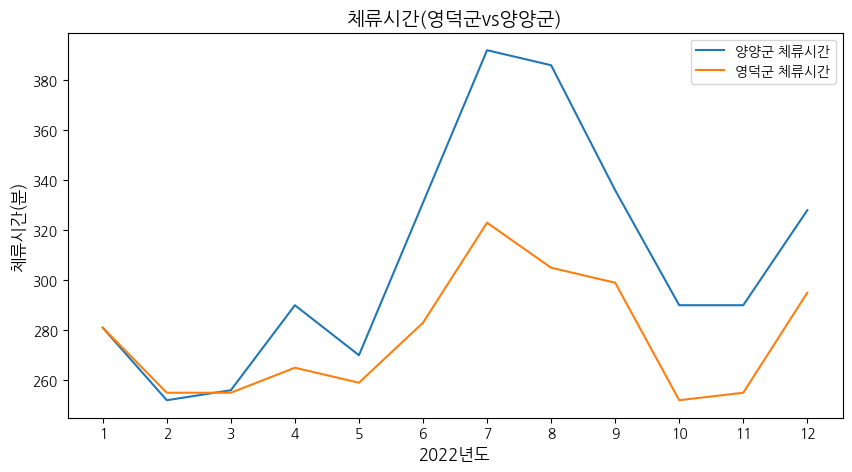

In [ ]:
plt.figure(figsize=(10, 5))

# 두 도시의 체류시간 관련 선형그래프 그리기
sns.lineplot(x=merged_time.index, y=merged_time['양양군_체류시간'], label='양양군 체류시간')
sns.lineplot(x=merged_time.index, y=merged_time['영덕군_체류시간'], label='영덕군 체류시간')

# 그래프에 제목과 축 레이블 추가
plt.title('체류시간(영덕군vs양양군)', fontsize=14)
plt.xlabel('2022년도', fontsize=12, )
plt.ylabel('체류시간(분)', fontsize=12)
plt.xticks(range(1, len(merged_time.index)+1), merged_time.index)
plt.show()

In [ ]:
yy_time['양양군_체류시간'].describe()

count     12.000000
mean     308.500000
std       46.549094
min      252.000000
25%      278.250000
50%      290.000000
75%      332.250000
max      392.000000
Name: 양양군_체류시간, dtype: float64

In [ ]:
yd_time['영덕군_체류시간'].describe()

count     12.000000
mean     277.250000
std       23.939792
min      252.000000
25%      255.000000
50%      273.000000
75%      296.000000
max      323.000000
Name: 영덕군_체류시간, dtype: float64